In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
geo = pd.read_csv("C:/Users/chaukt1/Desktop/Geometallurgy.csv")

In [3]:
geo.head()

,Hole_ID,Depth_From (m),Depth_To (m),Bond Work Index (kWh/t),Abression Index (kWh/t),Rodmill Index (kWh/t),Drop Weight index (kWh/t),RQD (%),Axb (kWh/t),target
0,KRED207,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,KRED207,10.0,14.0,10.3,0.32,13.7,21.0,45.00,0.67,1
2,KRED207,14.0,17.2,12.0,0.02,13.8,16.0,54.74,0.32,1
3,KRED207,17.2,27.0,12.0,0.02,13.8,16.0,54.74,0.32,1
4,KRED207,27.0,31.2,12.0,0.02,13.8,16.0,54.74,0.32,1


In [4]:
geo.shape

(1122, 10)

In [5]:
geo.describe()

,Depth_From (m),Depth_To (m),Bond Work Index (kWh/t),Abression Index (kWh/t),Rodmill Index (kWh/t),Drop Weight index (kWh/t),RQD (%),Axb (kWh/t),target
count,1122.000000,1122.000000,1046.000000,764.000000,1046.000000,1046.000000,1046.000000,1046.000000,1122.000000
mean,76.607264,85.316800,11.923996,0.431712,14.456692,9.176138,53.183403,23.115298,1.140820
std,51.802770,51.768181,3.447721,0.481913,3.884151,6.387623,15.874388,17.284998,0.347991
min,0.000000,4.800000,7.000000,0.015000,4.000000,0.016100,16.000000,0.031000,1.000000
25%,33.825000,44.625000,7.000000,0.020000,12.000000,0.016100,36.330000,0.670000,1.000000
50%,70.950000,77.600000,12.000000,0.320000,13.800000,11.300000,54.740000,29.100000,1.000000
75%,112.150000,122.375000,14.300000,0.780000,18.900000,12.800000,70.000000,41.100000,1.000000
max,281.800000,287.500000,19.600000,6.700000,18.900000,21.000000,72.000000,41.100000,2.000000


In [6]:
geo.dtypes

Hole_ID                        object
Depth_From (m)                float64
Depth_To (m)                  float64
Bond Work Index  (kWh/t)      float64
Abression Index  (kWh/t)      float64
Rodmill Index  (kWh/t)        float64
Drop Weight index  (kWh/t)    float64
RQD  (%)                      float64
Axb (kWh/t)                   float64
target                          int64
dtype: object

In [7]:
geo.isna().any()

Hole_ID                       False
Depth_From (m)                False
Depth_To (m)                  False
Bond Work Index  (kWh/t)       True
Abression Index  (kWh/t)       True
Rodmill Index  (kWh/t)         True
Drop Weight index  (kWh/t)     True
RQD  (%)                       True
Axb (kWh/t)                    True
target                        False
dtype: bool

In [8]:
geo.dropna(subset=['Abression Index  (kWh/t)'], how='all', inplace=True)

In [9]:
geo.isna().any()

Hole_ID                       False
Depth_From (m)                False
Depth_To (m)                  False
Bond Work Index  (kWh/t)      False
Abression Index  (kWh/t)      False
Rodmill Index  (kWh/t)        False
Drop Weight index  (kWh/t)    False
RQD  (%)                      False
Axb (kWh/t)                   False
target                        False
dtype: bool

In [10]:
geo.columns

Index(['Hole_ID', 'Depth_From (m)', 'Depth_To (m)', 'Bond Work Index  (kWh/t)',
       'Abression Index  (kWh/t)', 'Rodmill Index  (kWh/t)',
       'Drop Weight index  (kWh/t)', 'RQD  (%)', 'Axb (kWh/t)', 'target'],
      dtype='object')

In [11]:
from sdv.constraints import FixedCombinations

In [12]:
Location = FixedCombinations(column_names=['Depth_From (m)', 'Depth_To (m)'])

In [13]:
met = FixedCombinations(column_names=['Bond Work Index  (kWh/t)',
       'Abression Index  (kWh/t)', 'Rodmill Index  (kWh/t)',
       'Drop Weight index  (kWh/t)', 'RQD  (%)', 'Axb (kWh/t)'])

In [14]:
constraints = [Location,met]

In [15]:
from sdv.tabular import CTGAN

In [16]:
batch_size = 1000
epochs = 100

model = CTGAN(primary_key='Hole_ID',constraints=constraints, generator_dim=(256, 256, 256),
              discriminator_dim=(256, 256, 256), batch_size=batch_size, epochs=epochs, verbose=True)
model.fit(geo)

Epoch 1, Loss G:  4.5520,Loss D:  0.0019
Epoch 2, Loss G:  4.5469,Loss D:  0.0019
Epoch 3, Loss G:  4.5529,Loss D: -0.0024
Epoch 4, Loss G:  4.5541,Loss D: -0.0096
Epoch 5, Loss G:  4.3765,Loss D: -0.0095
Epoch 6, Loss G:  4.3672,Loss D: -0.0045
Epoch 7, Loss G:  4.5997,Loss D: -0.0063
Epoch 8, Loss G:  4.5045,Loss D: -0.0115
Epoch 9, Loss G:  4.4820,Loss D: -0.0188
Epoch 10, Loss G:  4.4602,Loss D: -0.0208
Epoch 11, Loss G:  4.6487,Loss D: -0.0170
Epoch 12, Loss G:  4.3409,Loss D: -0.0179
Epoch 13, Loss G:  4.3975,Loss D: -0.0223
Epoch 14, Loss G:  4.3735,Loss D: -0.0184
Epoch 15, Loss G:  4.4775,Loss D: -0.0256
Epoch 16, Loss G:  4.5393,Loss D: -0.0265
Epoch 17, Loss G:  4.4587,Loss D: -0.0263
Epoch 18, Loss G:  4.4363,Loss D: -0.0186
Epoch 19, Loss G:  4.4366,Loss D: -0.0164
Epoch 20, Loss G:  4.4323,Loss D: -0.0276
Epoch 21, Loss G:  4.3496,Loss D: -0.0096
Epoch 22, Loss G:  4.3700,Loss D: -0.0138
Epoch 23, Loss G:  4.1930,Loss D: -0.0068
Epoch 24, Loss G:  4.3499,Loss D: -0.0182
E

In [17]:
n_generated_data = 1122
new_geo = model.sample(n_generated_data)

Sampling rows: 100%|██████████| 1122/1122 [00:00<00:00, 6892.37it/s]


In [18]:
from sdv.evaluation import evaluate

In [19]:
from sdv.evaluation import evaluate

evaluate(new_geo, geo)

0.46377982680723673

In [20]:
from table_evaluator import load_data, TableEvaluator

In [21]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(geo, new_geo)
table_evaluator.evaluate(target_col='target')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.1569   0.8431              0.0699
DecisionTreeClassifier_real   1.0000   0.8170              0.6906
LogisticRegression_fake       0.1569   0.9085              0.0338
LogisticRegression_real       0.9869   0.8235              0.7191
MLPClassifier_fake            0.1569   0.8562              0.0699
MLPClassifier_real            0.9673   0.8170              0.7000
RandomForestClassifier_fake   0.1569   0.9020              0.0373
RandomForestClassifier_real   1.0000   0.8301              0.7095

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.0976
nearest neighbor std                     0.3071

Miscellaneous results:
                                  Result
Column Cor

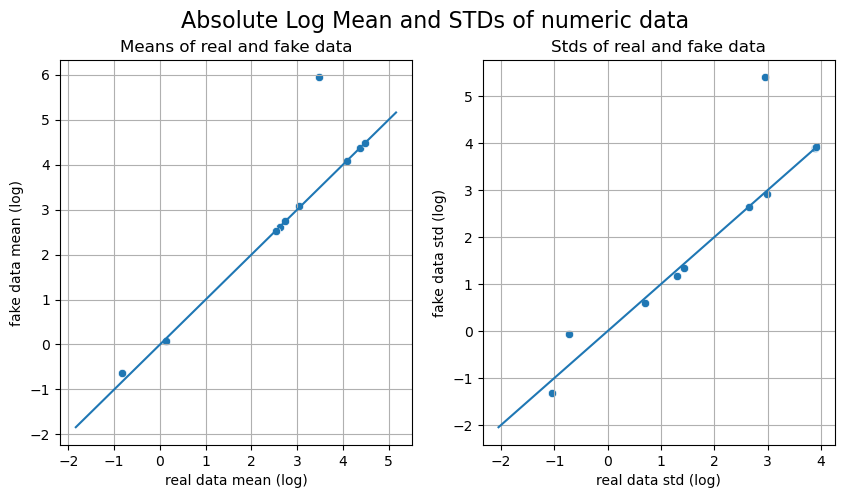

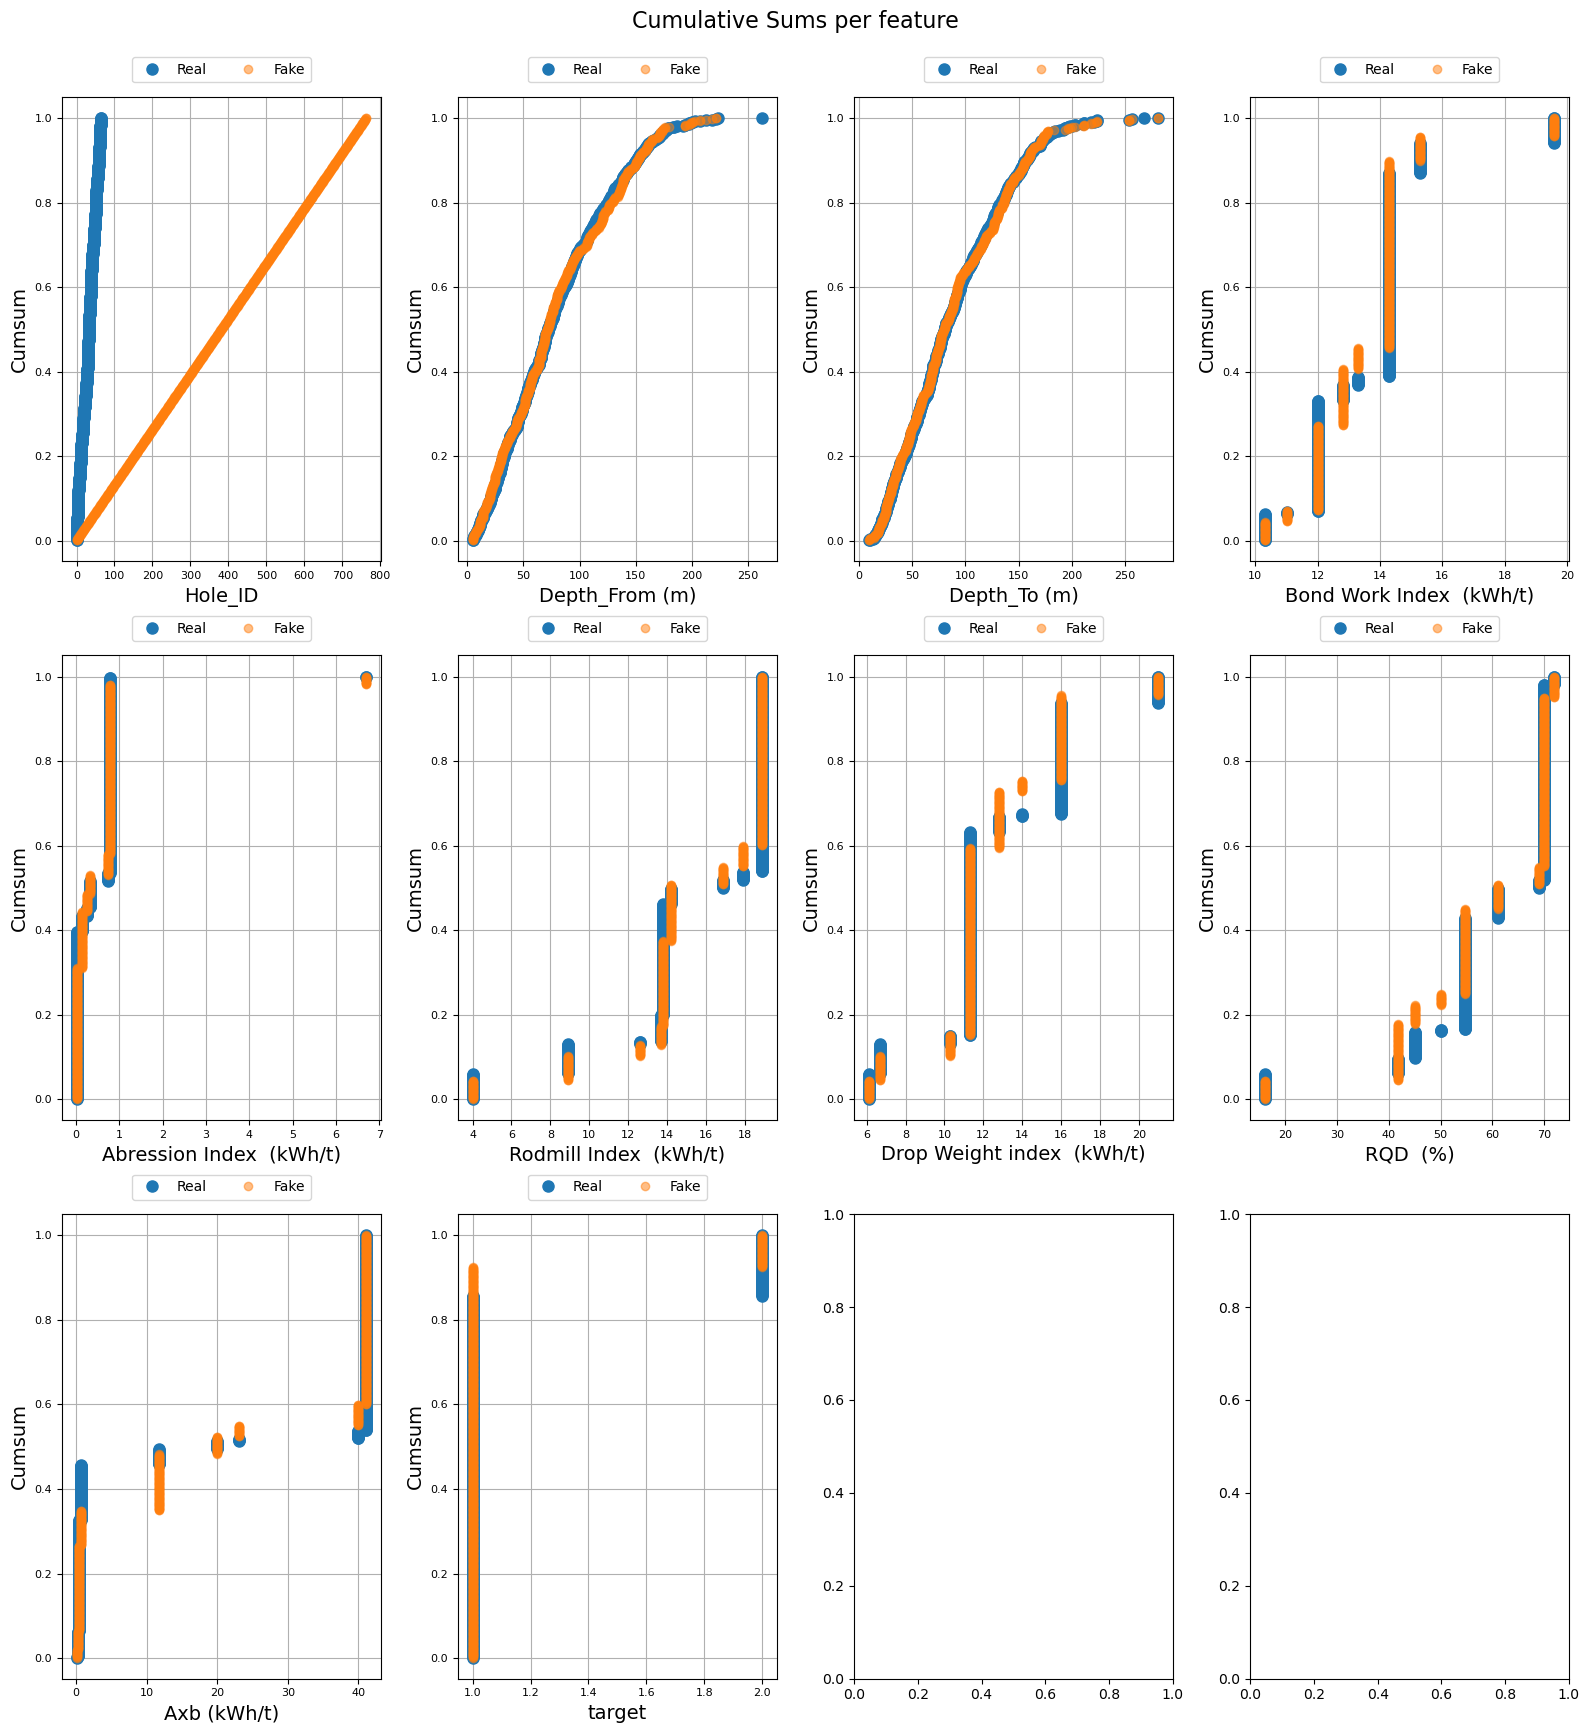

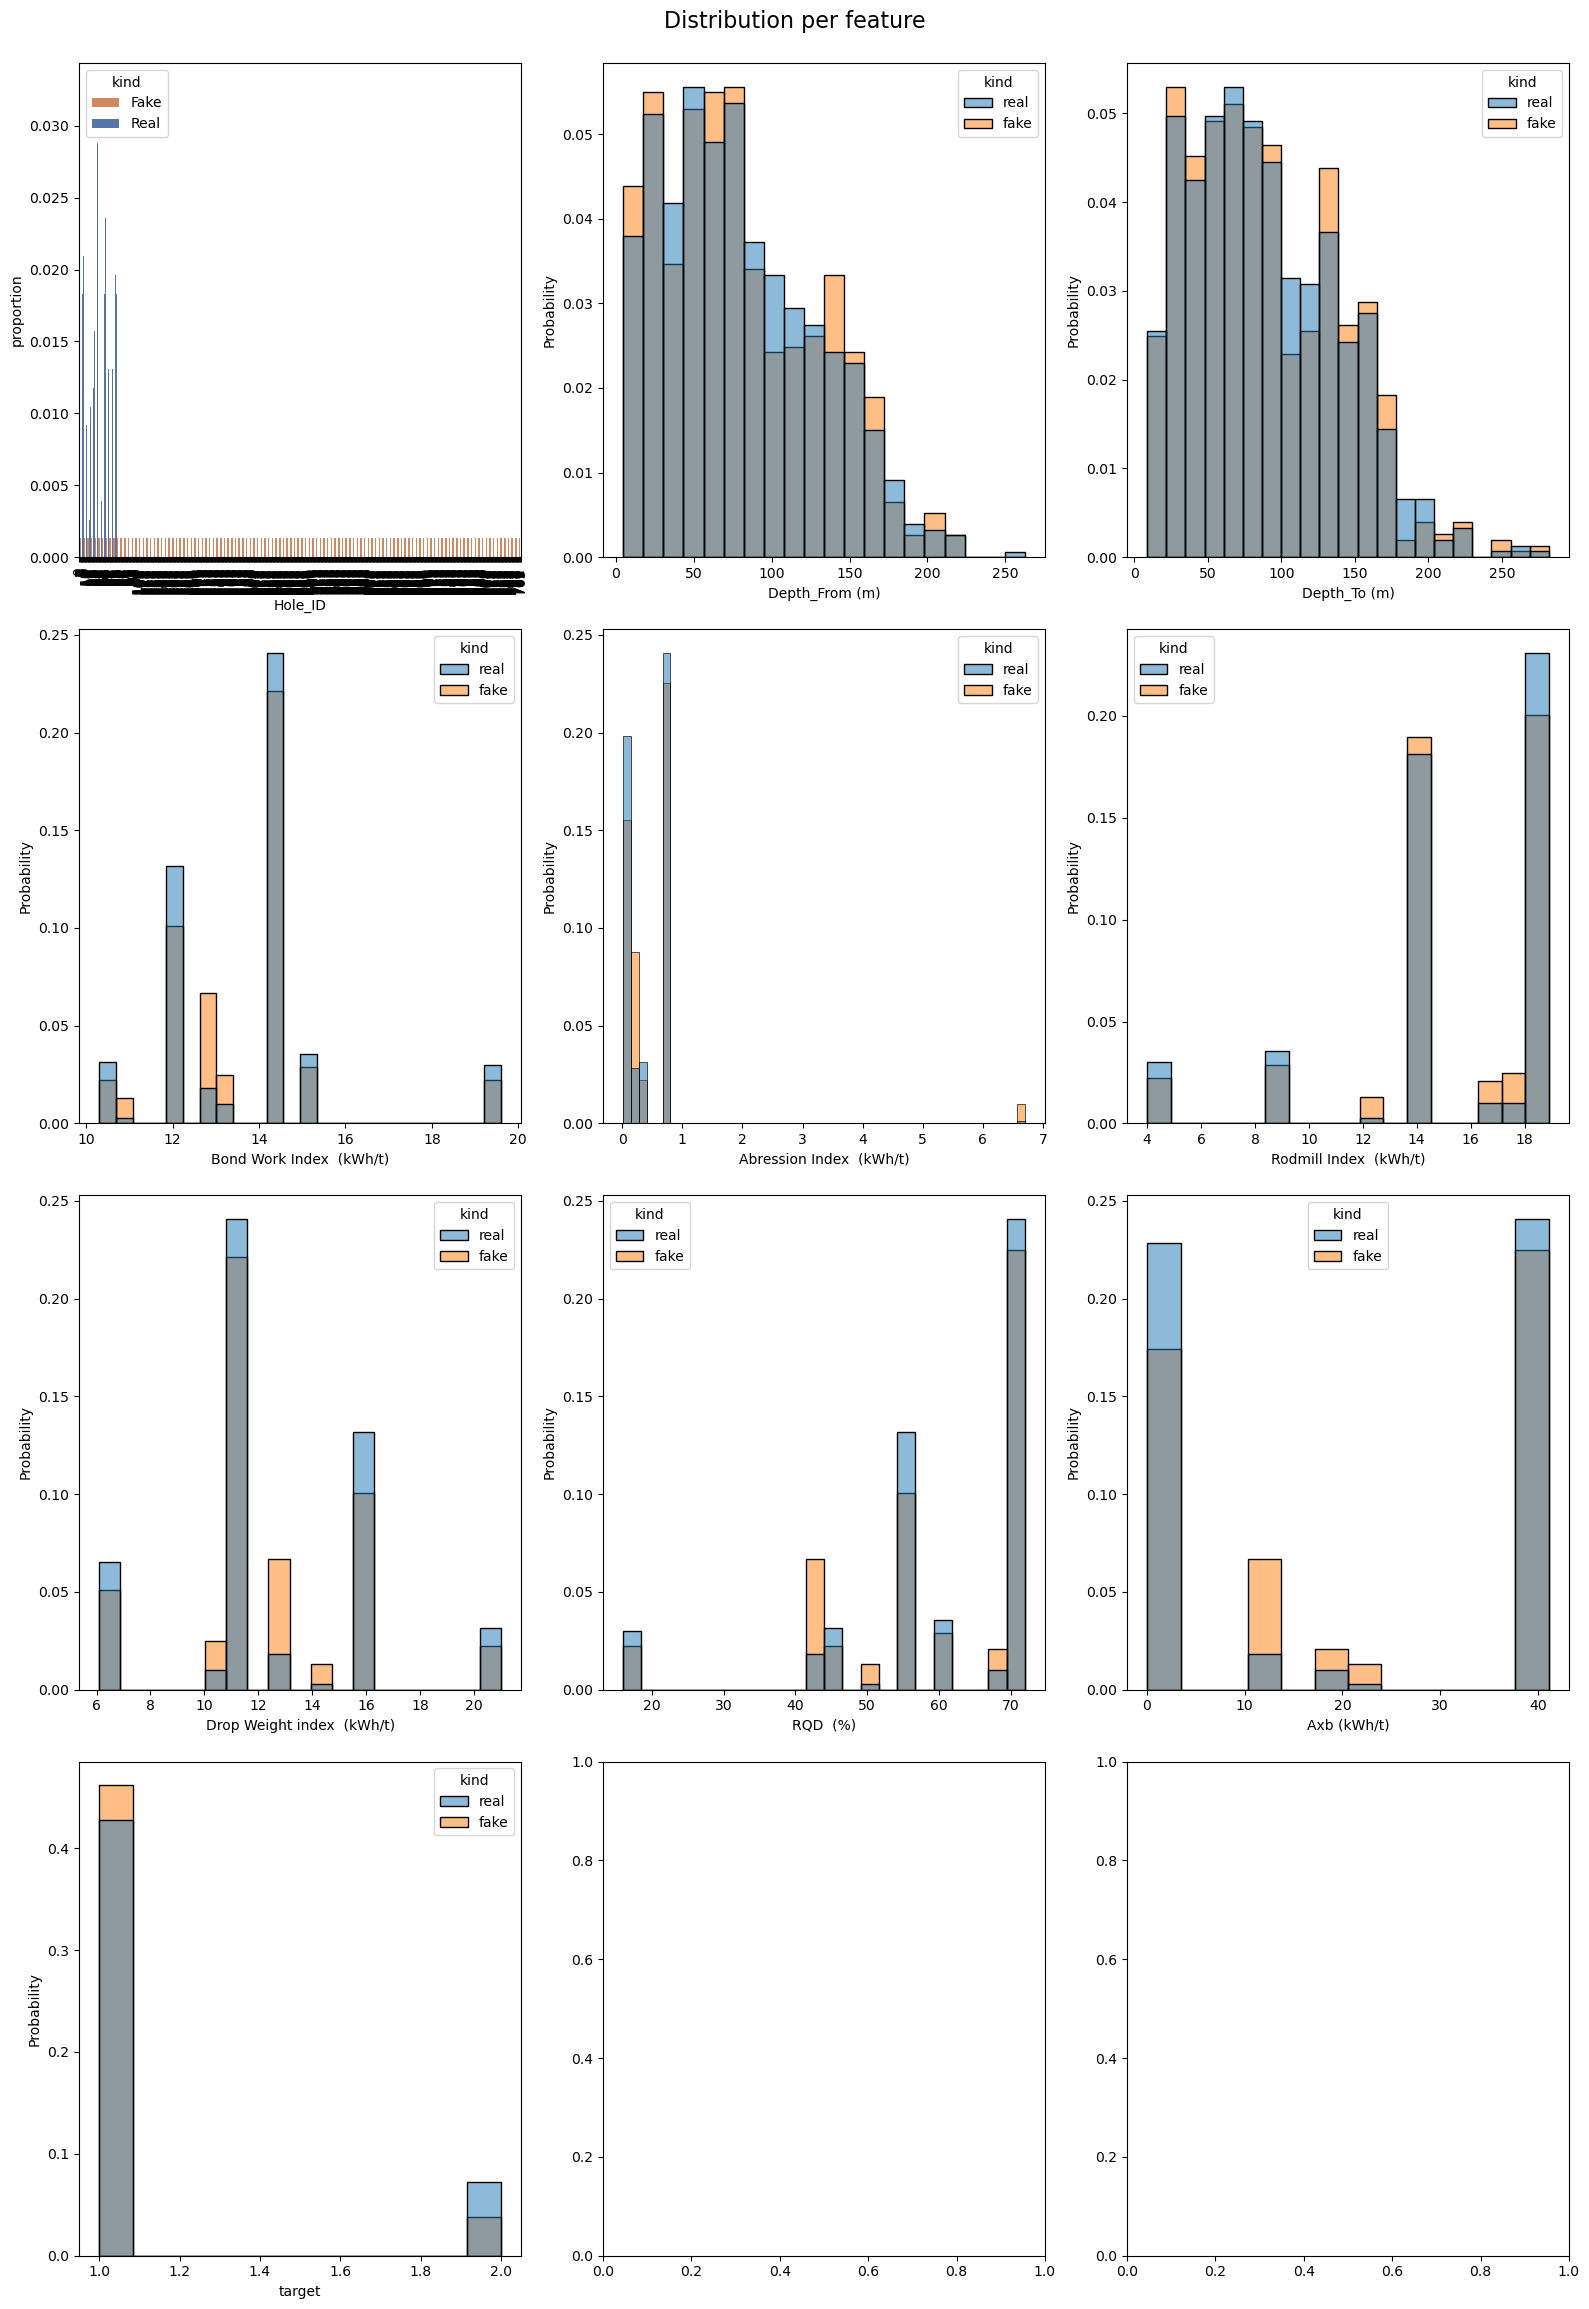

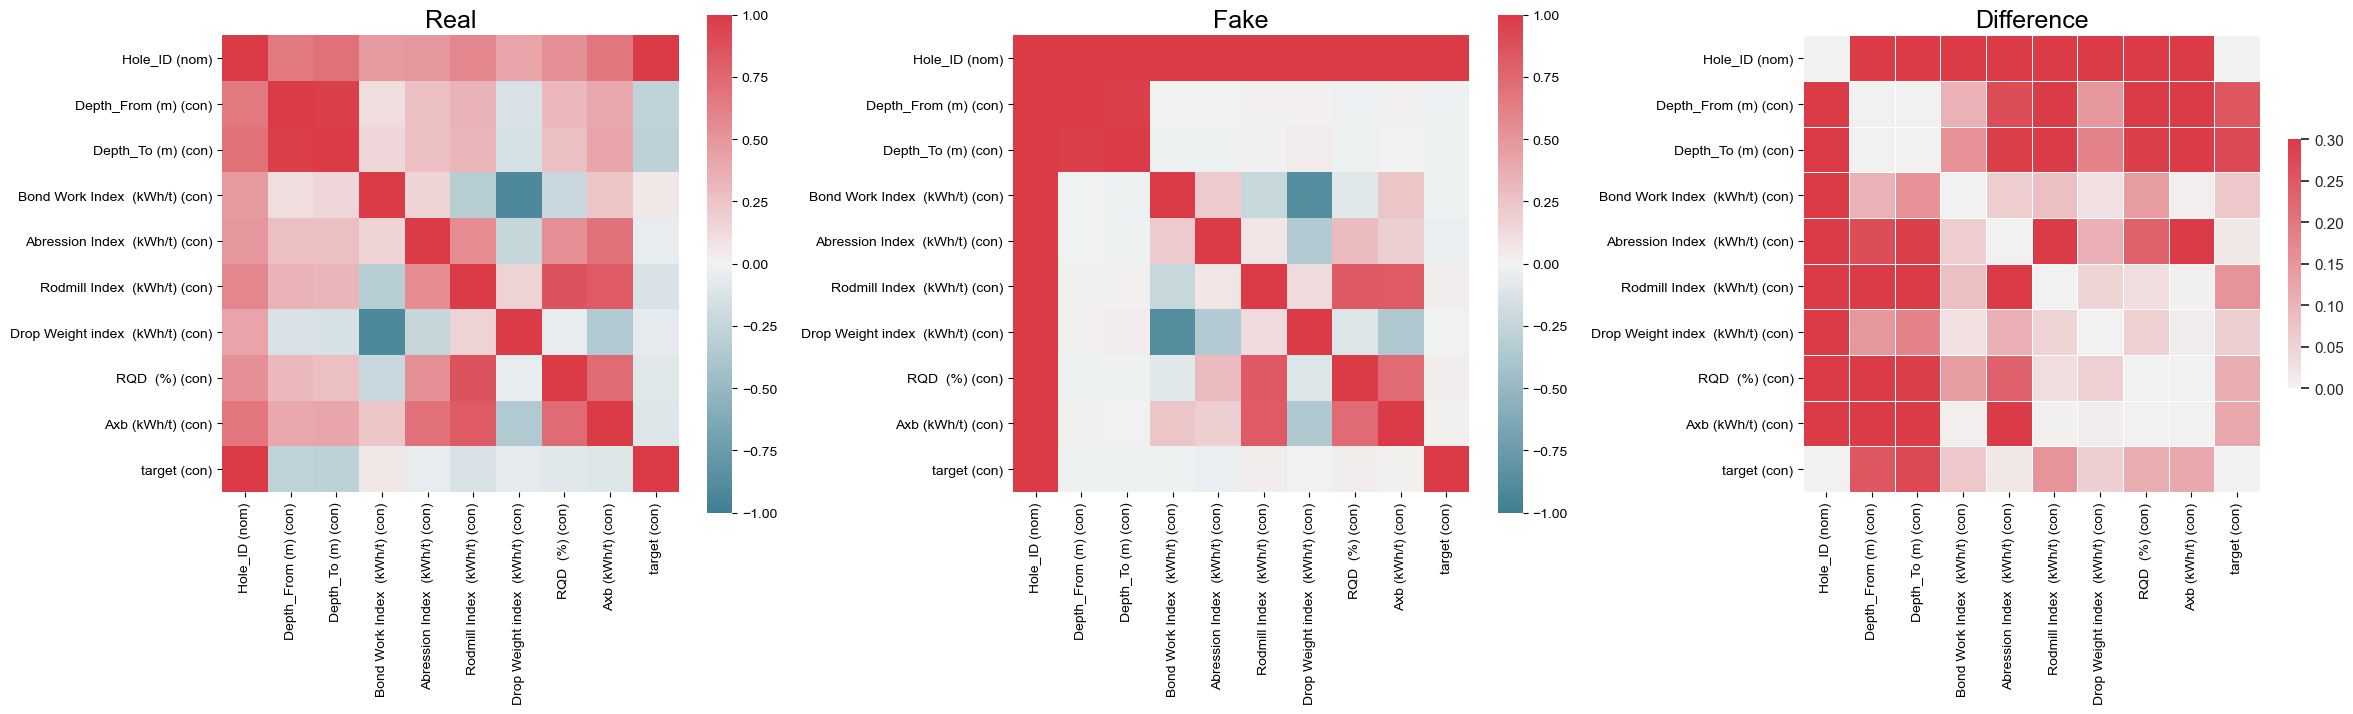

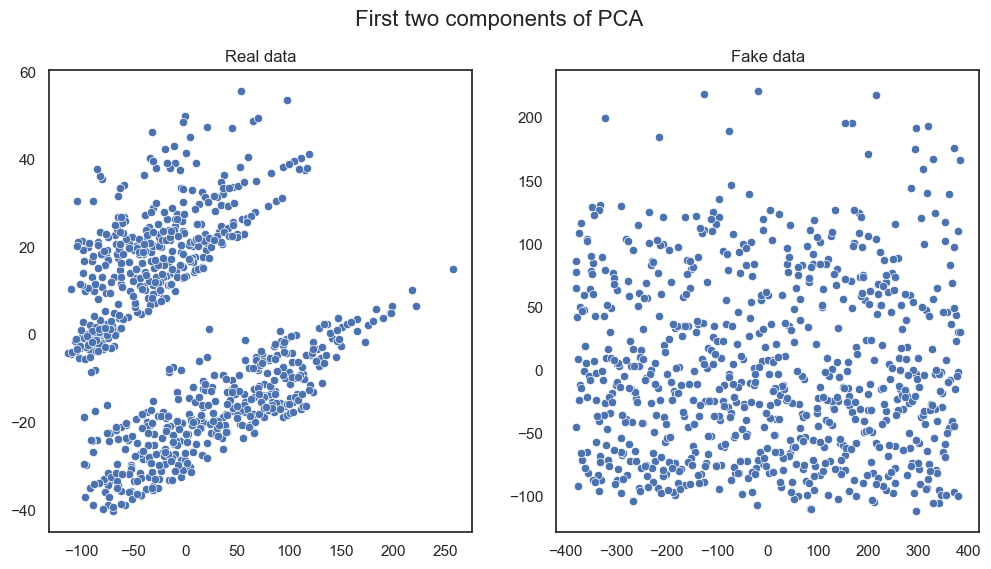

In [22]:
table_evaluator.visual_evaluation()

In [23]:
from sdv.tabular import CopulaGAN

In [24]:
model = CopulaGAN(primary_key='Hole_ID',
                 constraints=constraints,epochs=100,batch_size=1000,
                  generator_dim=(256, 256, 256),discriminator_dim=(256, 256, 256),verbose=True)
model.fit(geo)
new_data = model.sample(1122)
new_data.head()

Epoch 1, Loss G:  4.3924,Loss D:  0.0019
Epoch 2, Loss G:  4.4409,Loss D:  0.0056
Epoch 3, Loss G:  4.4836,Loss D: -0.0051
Epoch 4, Loss G:  4.4471,Loss D:  0.0008
Epoch 5, Loss G:  4.2890,Loss D: -0.0017
Epoch 6, Loss G:  4.4496,Loss D: -0.0091
Epoch 7, Loss G:  4.3751,Loss D: -0.0082
Epoch 8, Loss G:  4.3050,Loss D: -0.0095
Epoch 9, Loss G:  4.2509,Loss D: -0.0153
Epoch 10, Loss G:  4.3878,Loss D: -0.0152
Epoch 11, Loss G:  4.2900,Loss D: -0.0223
Epoch 12, Loss G:  4.3145,Loss D: -0.0192
Epoch 13, Loss G:  4.4117,Loss D: -0.0263
Epoch 14, Loss G:  4.3031,Loss D: -0.0287
Epoch 15, Loss G:  4.2550,Loss D: -0.0217
Epoch 16, Loss G:  4.2708,Loss D: -0.0234
Epoch 17, Loss G:  4.3312,Loss D: -0.0280
Epoch 18, Loss G:  4.3001,Loss D: -0.0301
Epoch 19, Loss G:  4.2109,Loss D: -0.0159
Epoch 20, Loss G:  4.2918,Loss D: -0.0147
Epoch 21, Loss G:  4.2802,Loss D: -0.0271
Epoch 22, Loss G:  4.2076,Loss D: -0.0247
Epoch 23, Loss G:  4.3238,Loss D: -0.0205
Epoch 24, Loss G:  4.1637,Loss D: -0.0139
E

Sampling rows: 100%|██████████| 1122/1122 [00:00<00:00, 2760.01it/s]


,Hole_ID,Depth_From (m),Depth_To (m),Bond Work Index (kWh/t),Abression Index (kWh/t),Rodmill Index (kWh/t),Drop Weight index (kWh/t),RQD (%),Axb (kWh/t),target
0,a,10.5000,59.0000,14.3000,0.7800,18.9000,11.3000,70.0000,41.1000,1
1,b,104.3000,136.8000,10.3000,0.3200,13.7000,21.0000,45.0000,0.6700,1
2,c,69.7000,75.9000,11.0000,0.0150,12.6000,14.0000,50.0000,23.0000,1
3,d,130.7000,136.5000,12.0000,0.0200,13.8000,16.0000,54.7400,0.3200,1
4,e,44.5000,51.6000,19.6000,0.0200,4.0000,6.1000,16.0000,0.2400,1


In [25]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(geo, new_data)
table_evaluator.evaluate(target_col='target')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.1438   0.8824              0.0625
DecisionTreeClassifier_real   1.0000   0.8562              0.7486
LogisticRegression_fake       0.1438   0.9216              0.0408
LogisticRegression_real       1.0000   0.8627              0.7586
MLPClassifier_fake            0.1373   0.9150              0.0408
MLPClassifier_real            0.9608   0.8627              0.7586
RandomForestClassifier_fake   0.1438   0.9150              0.0444
RandomForestClassifier_real   1.0000   0.8627              0.7586

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.0774
nearest neighbor std                     0.2821

Miscellaneous results:
                                  Result
Column Cor

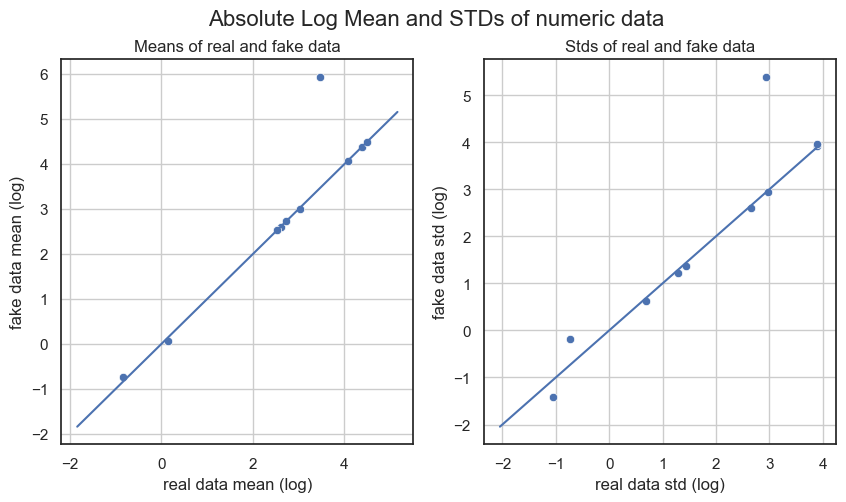

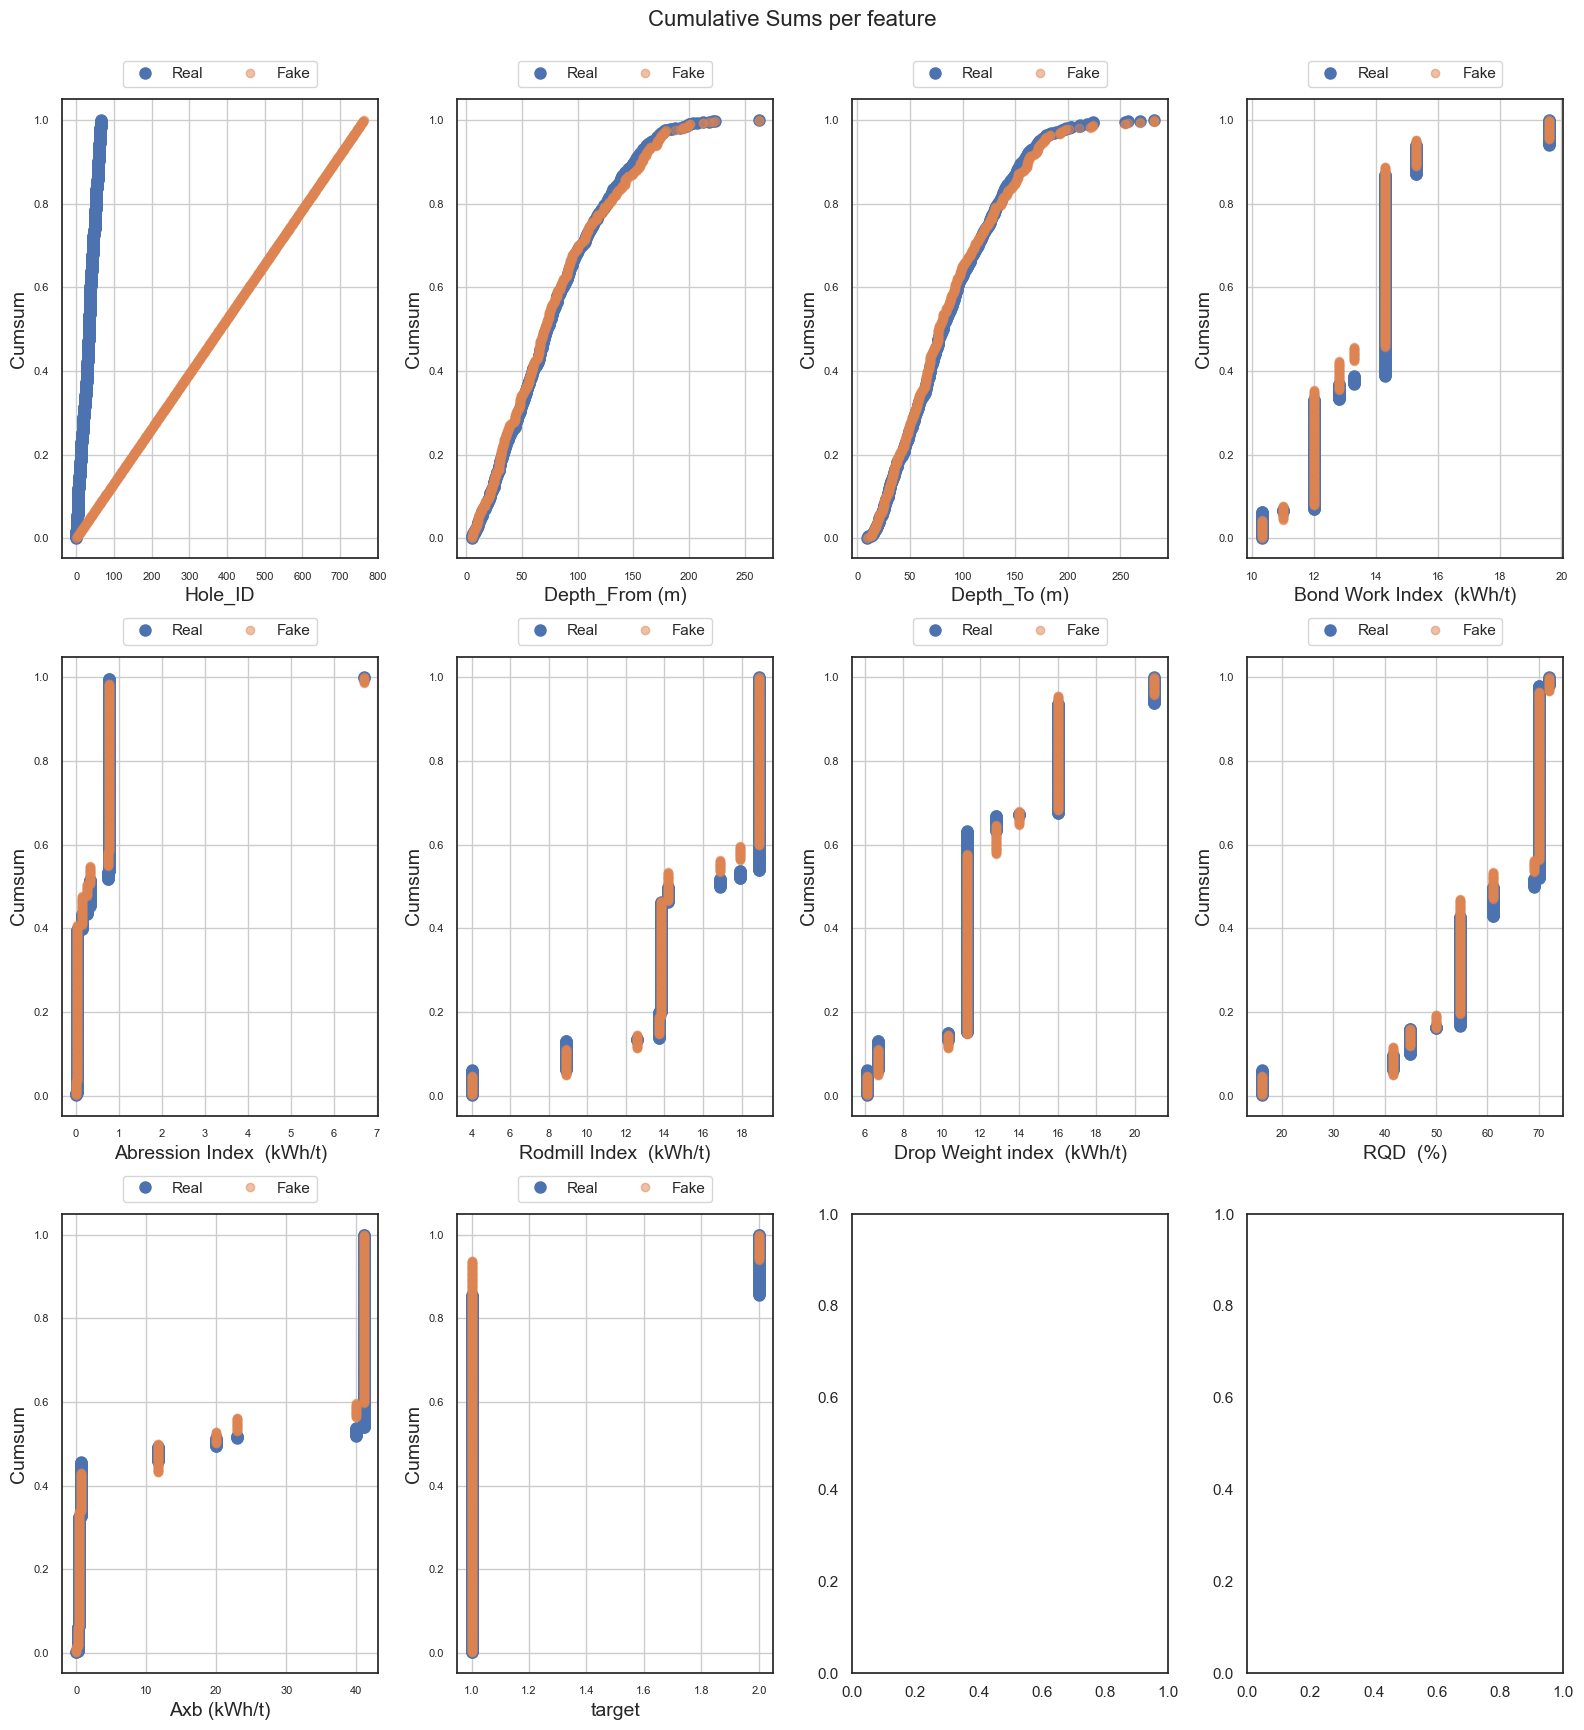

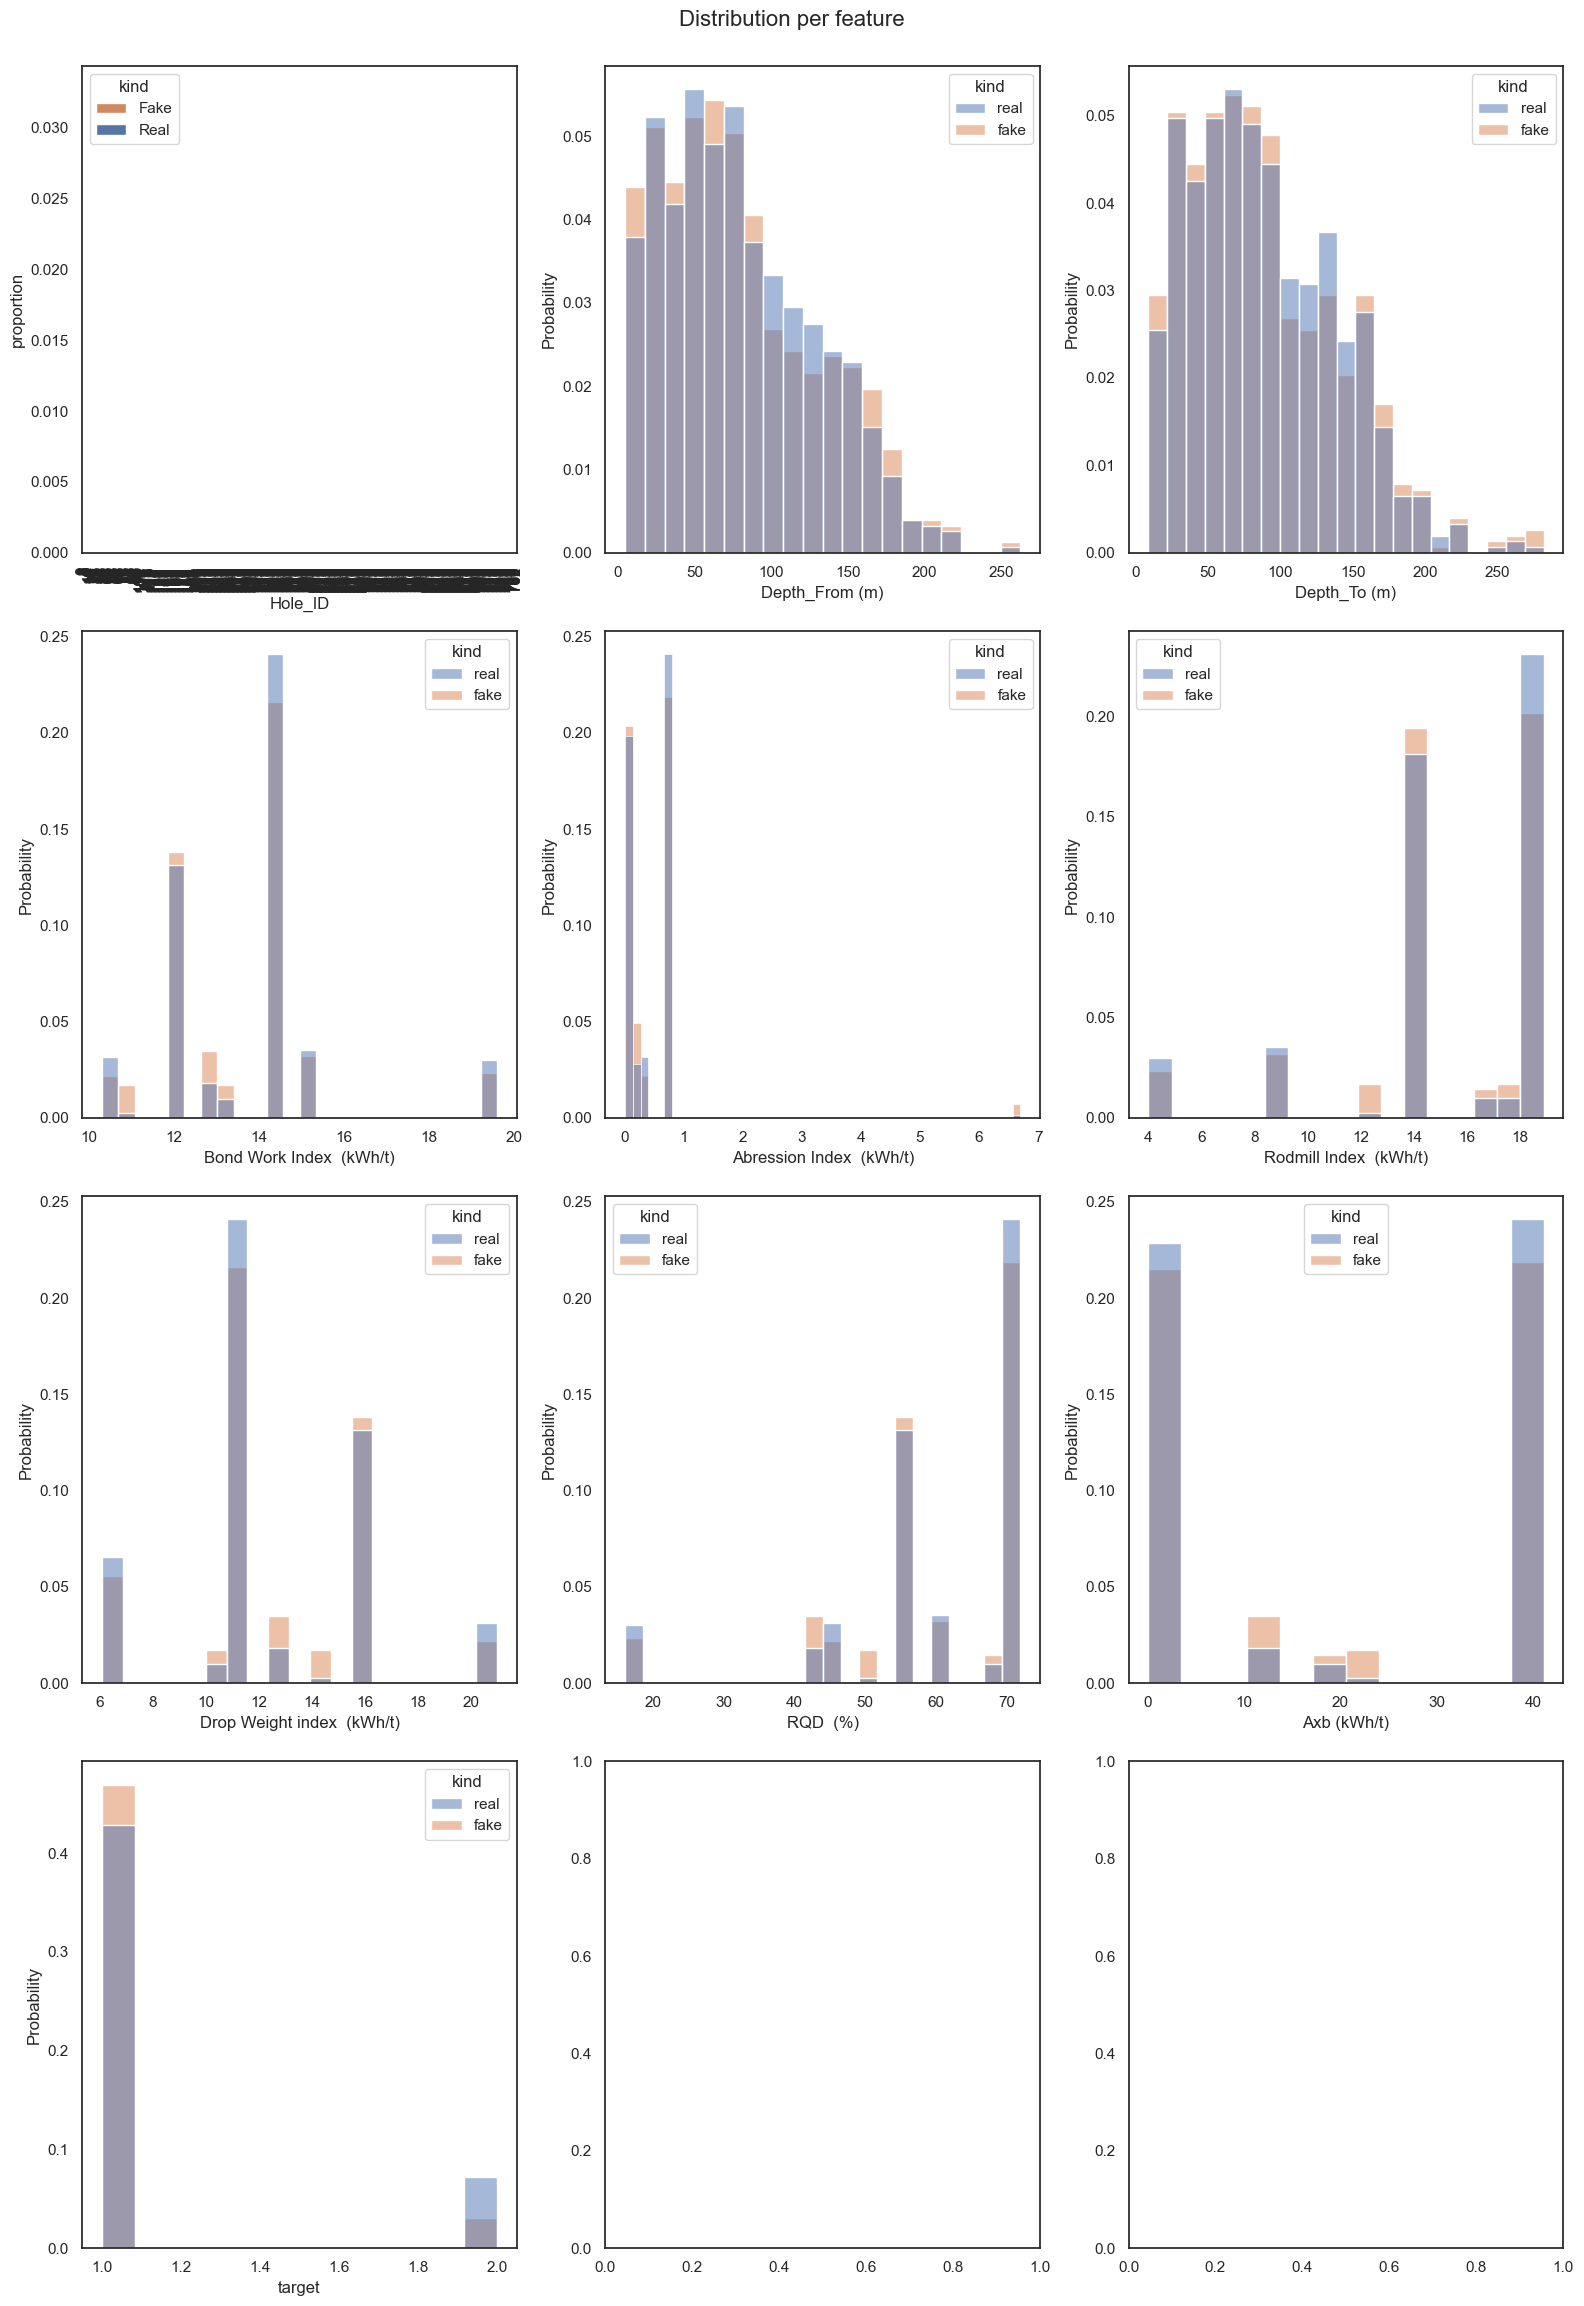

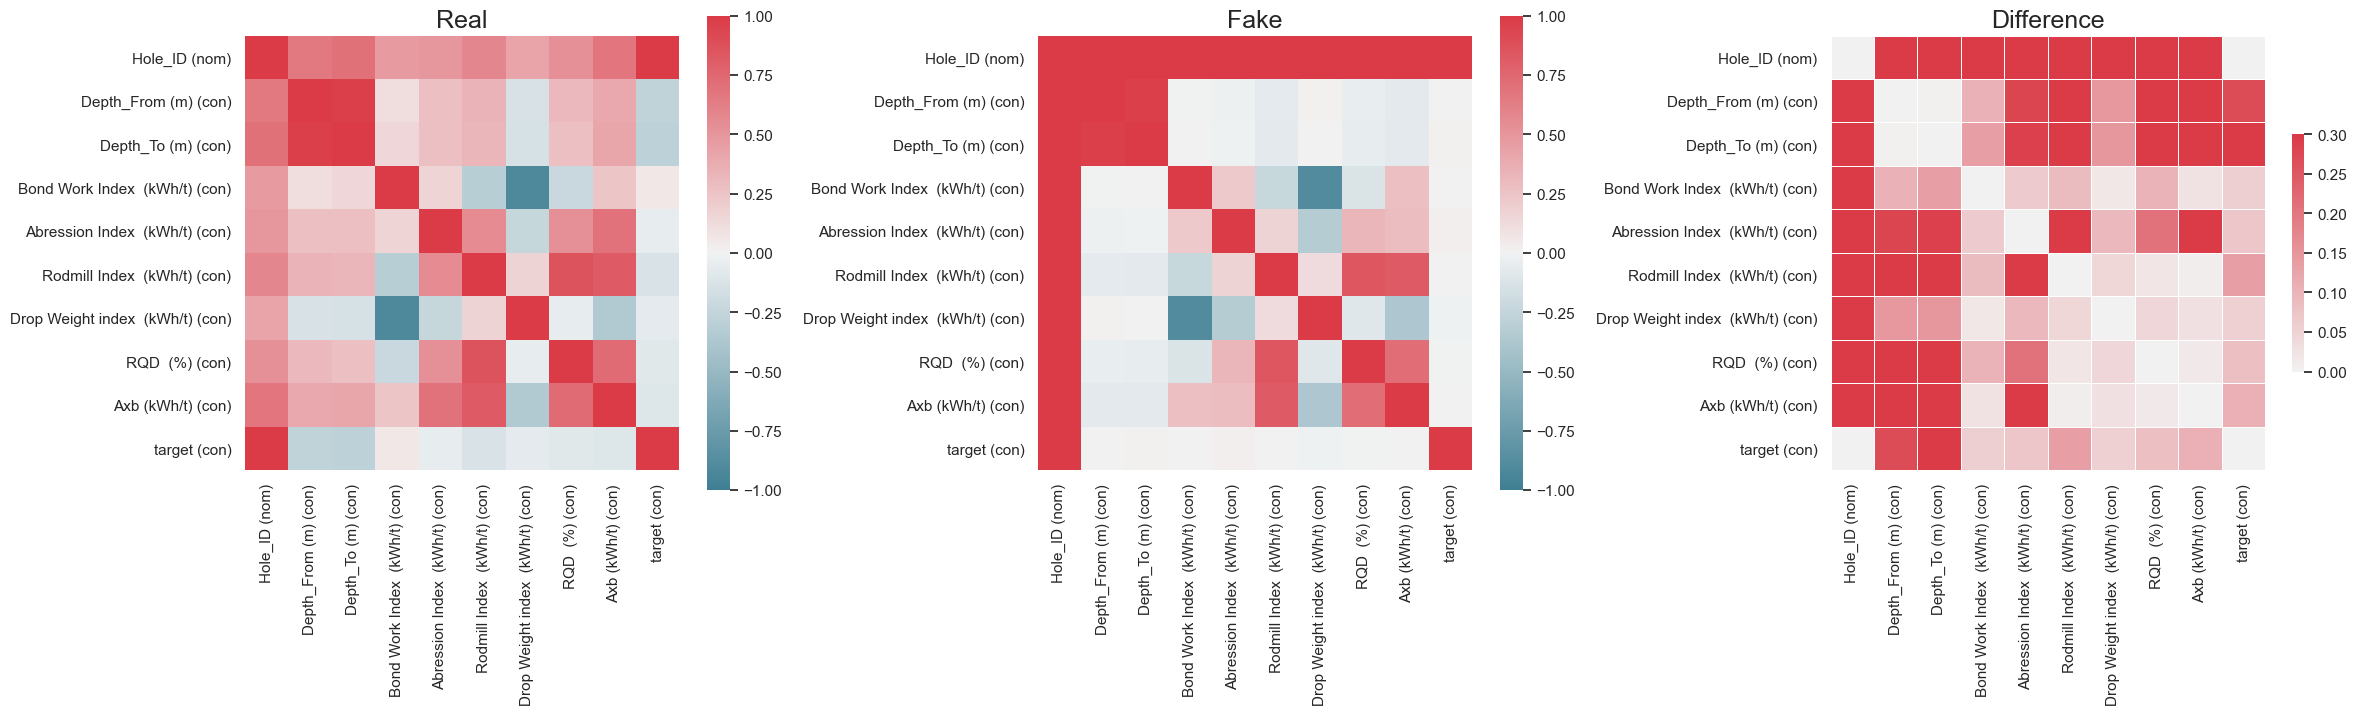

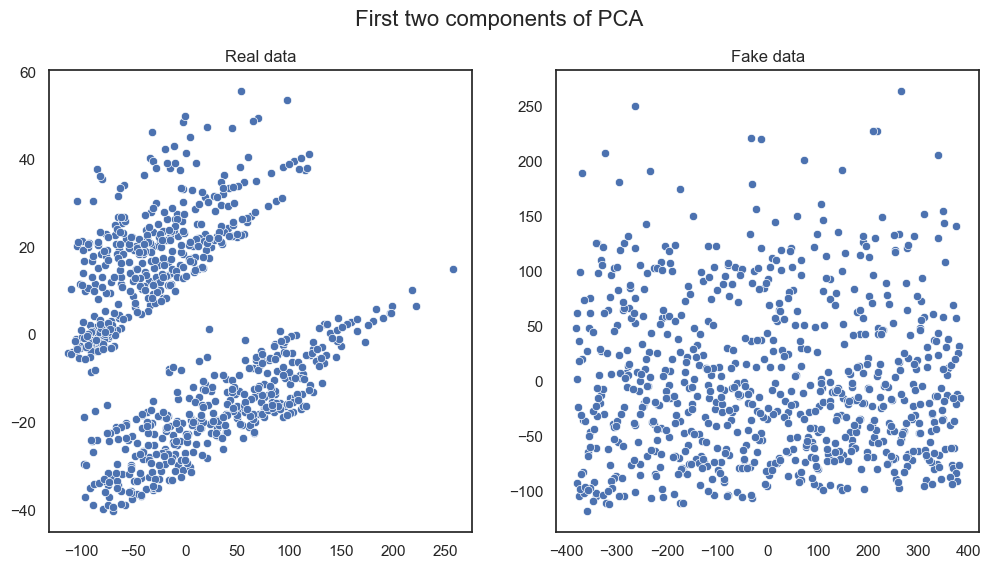

In [26]:
table_evaluator.visual_evaluation()

In [27]:
from sdv.evaluation import evaluate

evaluate(new_data, geo)

0.47567931133530145

In [28]:
from sdv.tabular import GaussianCopula

In [29]:
model = GaussianCopula(primary_key='Hole_ID',constraints=constraints,
                      field_distributions={'RQD  (%)': 'beta'})
model.fit(geo)
new_data2 = model.sample(1122)
new_data2.head()

Sampling rows: 100%|██████████| 1122/1122 [00:00<00:00, 21487.35it/s]


,Hole_ID,Depth_From (m),Depth_To (m),Bond Work Index (kWh/t),Abression Index (kWh/t),Rodmill Index (kWh/t),Drop Weight index (kWh/t),RQD (%),Axb (kWh/t),target
0,a,78.5000,81.0000,12.0000,0.0200,13.8000,16.0000,54.7400,0.3200,1
1,b,139.0000,145.0000,19.6000,0.0200,4.0000,6.1000,16.0000,0.2400,2
2,c,212.0000,223.0000,12.0000,0.0200,13.8000,16.0000,54.7400,0.3200,1
3,d,57.6000,64.2500,12.8000,0.1470,14.2000,12.8000,41.6800,11.7000,1
4,e,56.0000,58.8000,14.3000,0.7800,18.9000,11.3000,70.0000,41.1000,1


In [30]:
from sdv.evaluation import evaluate

evaluate(new_data2, geo)

0.48534648403758357

In [31]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(geo, new_data2)
table_evaluator.evaluate(target_col='target')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.2353   0.7451              0.1635
DecisionTreeClassifier_real   1.0000   0.7712              0.6277
LogisticRegression_fake       0.2353   0.8170              0.0408
LogisticRegression_real       0.9935   0.8562              0.7386
MLPClassifier_fake            0.2418   0.7974              0.0699
MLPClassifier_real            0.9608   0.8235              0.7000
RandomForestClassifier_fake   0.2222   0.7778              0.1087
RandomForestClassifier_real   0.9935   0.8497              0.7486

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.0335
nearest neighbor std                     0.6134

Miscellaneous results:
                                  Result
Column Cor

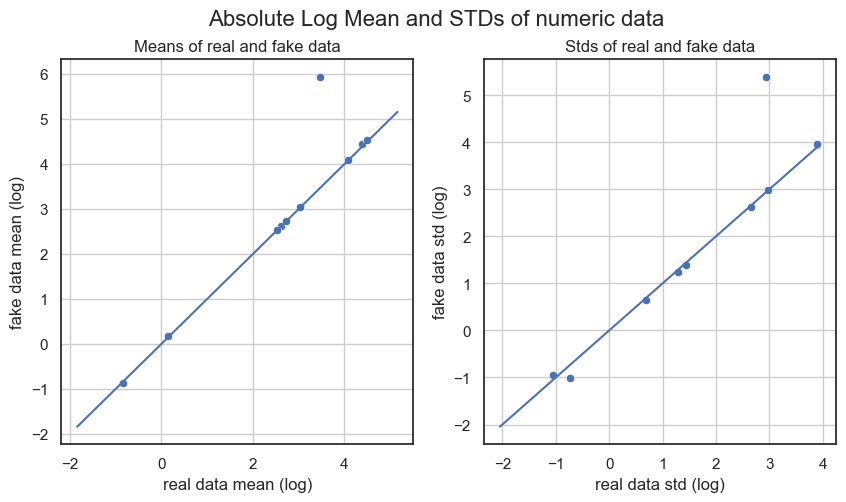

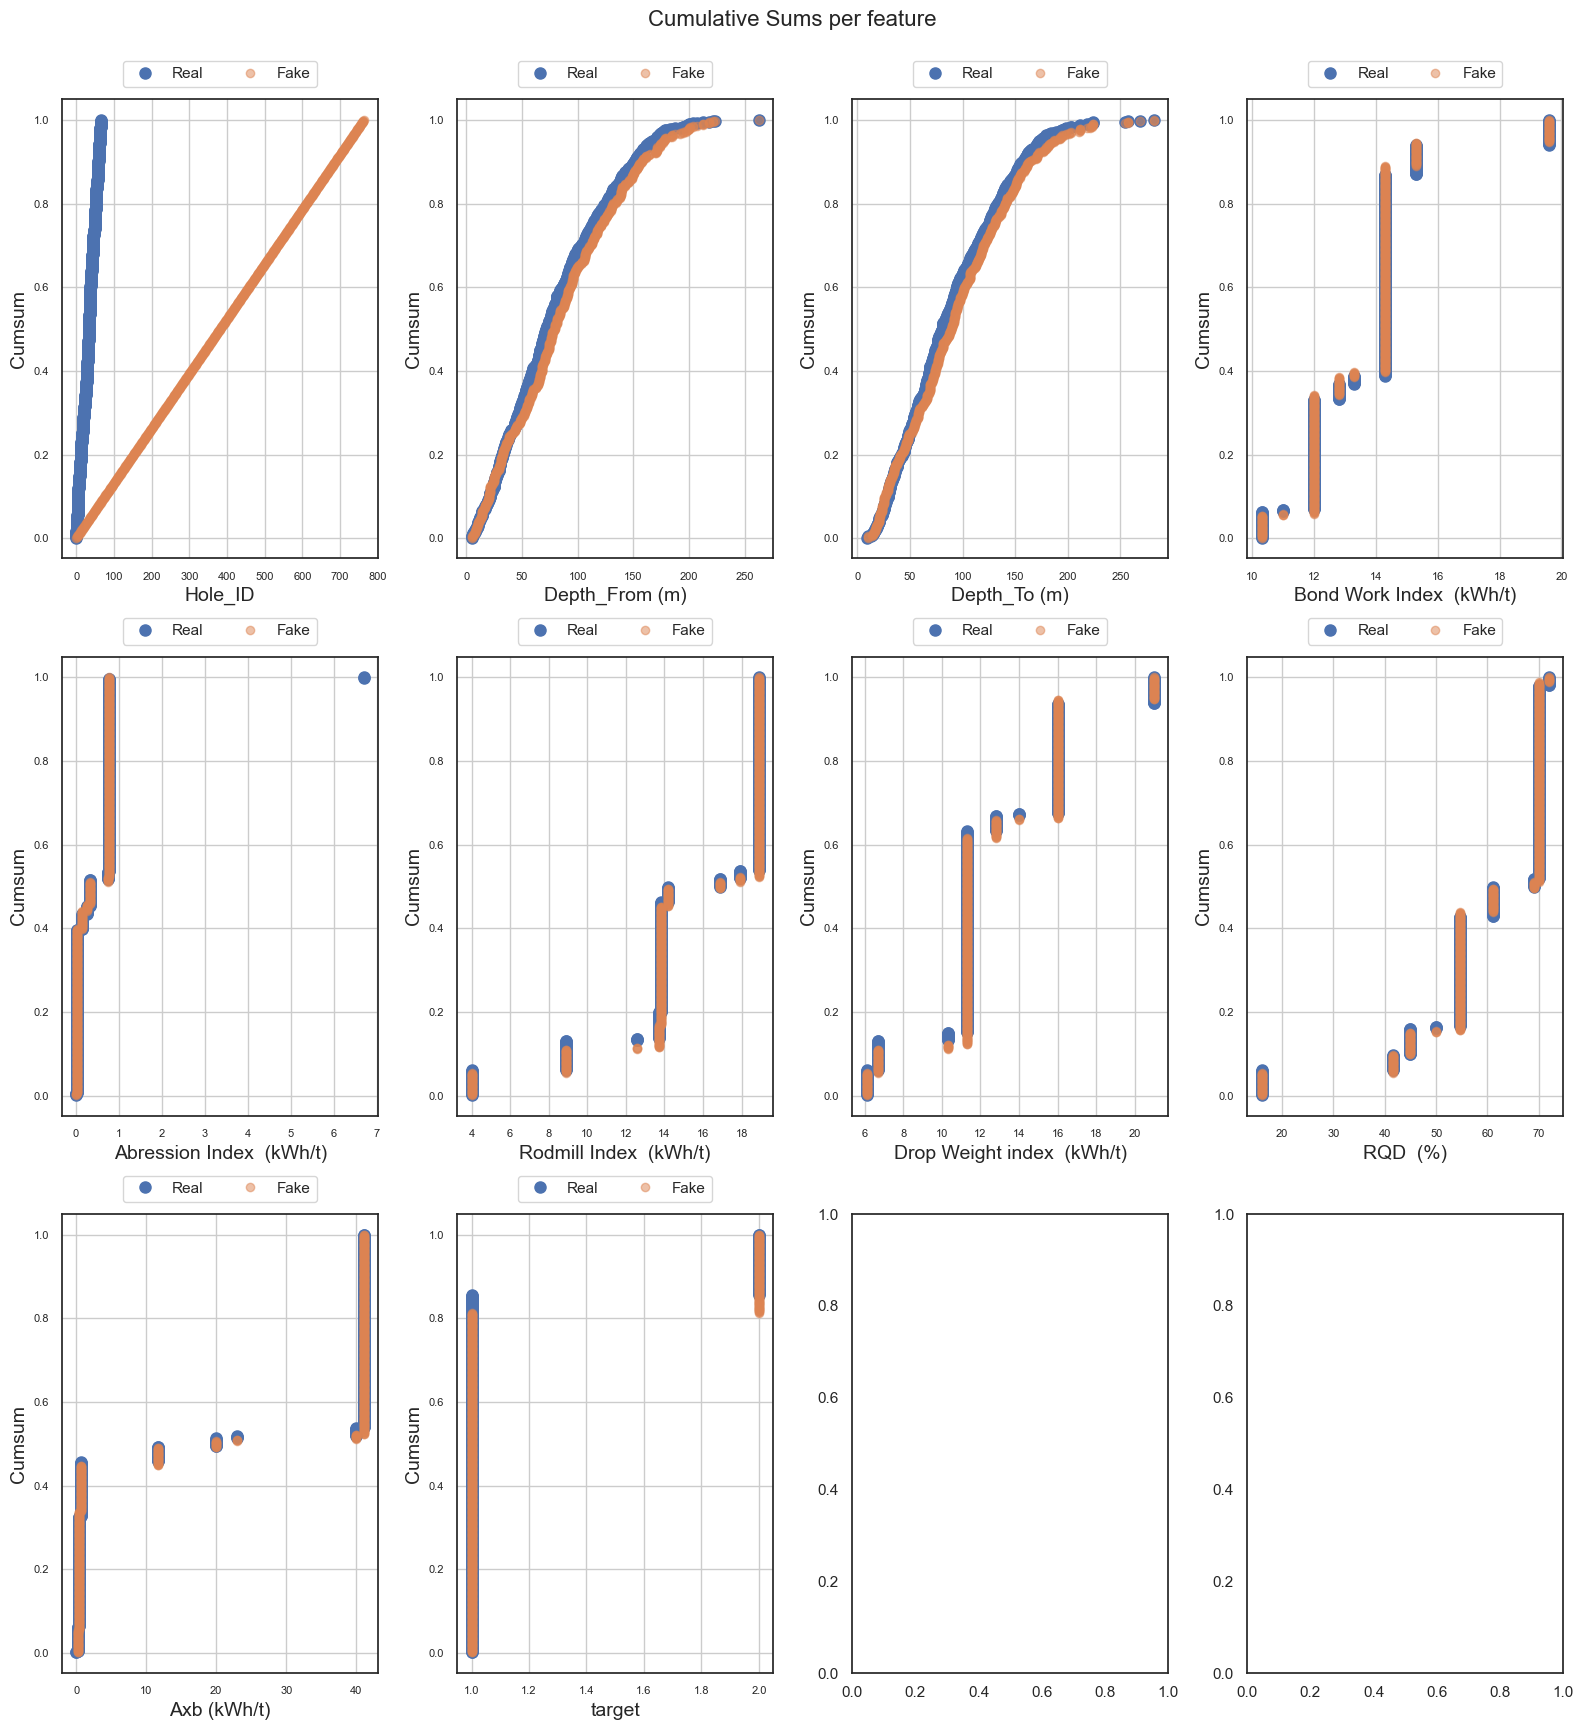

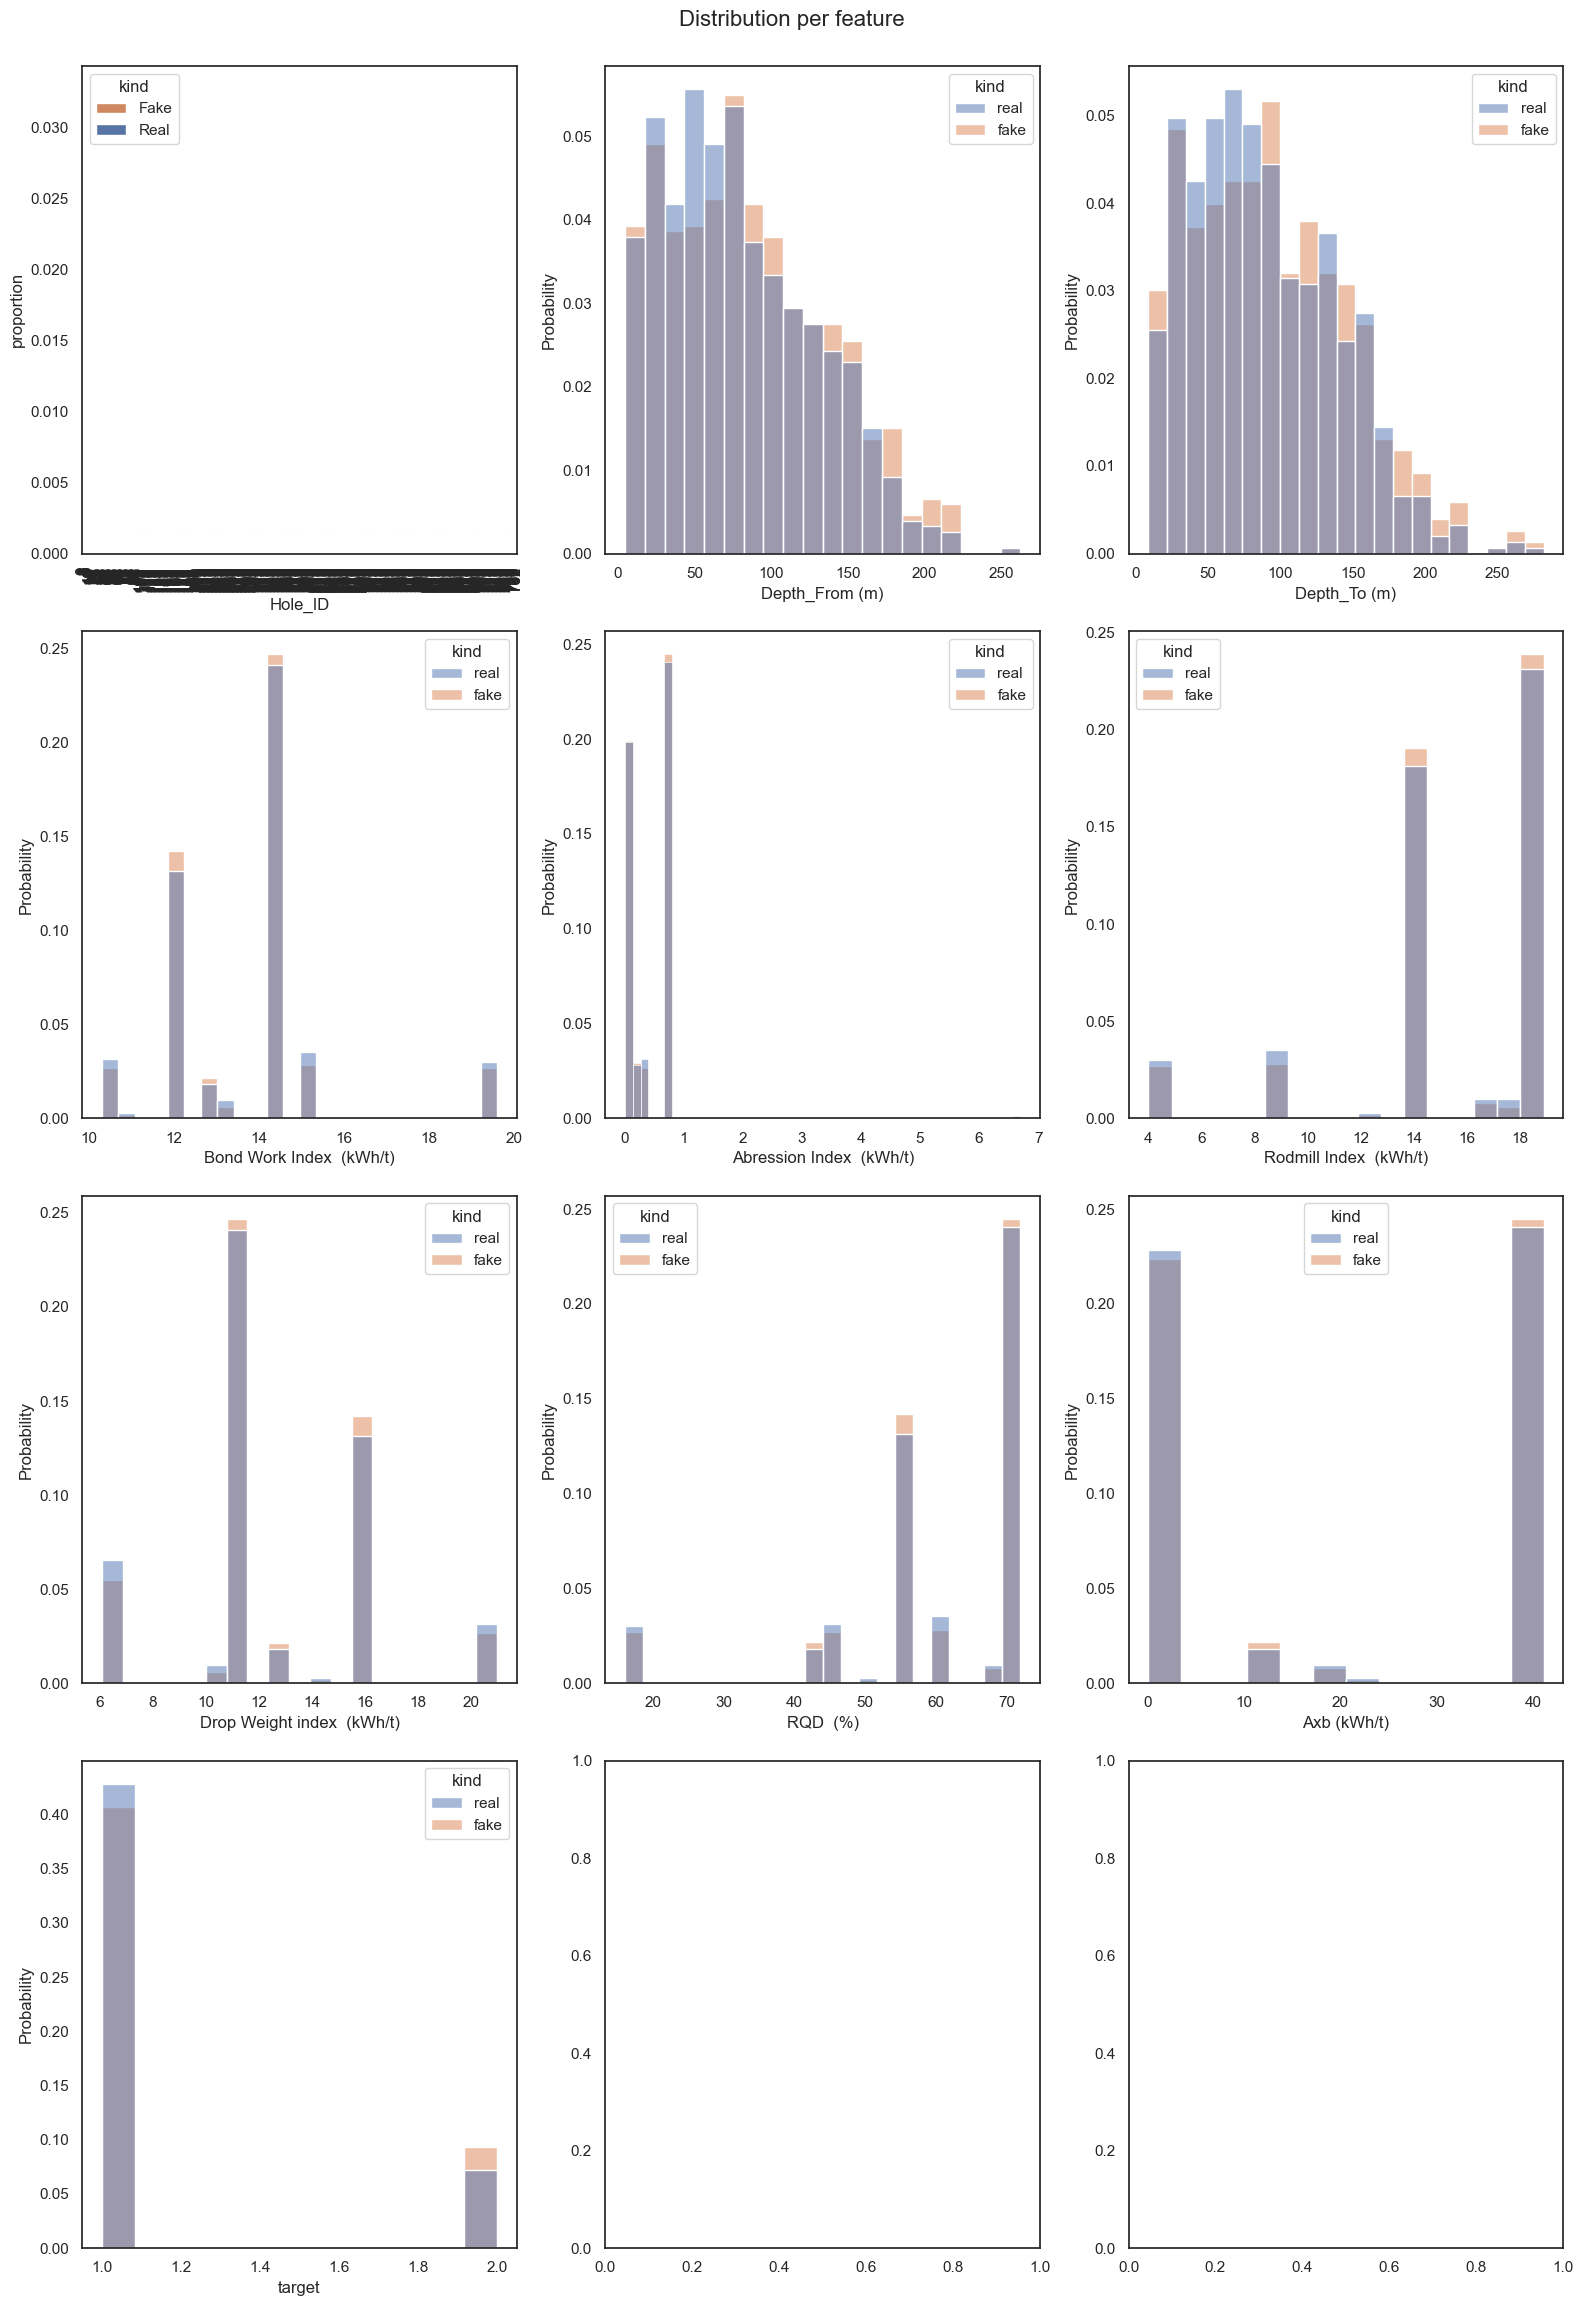

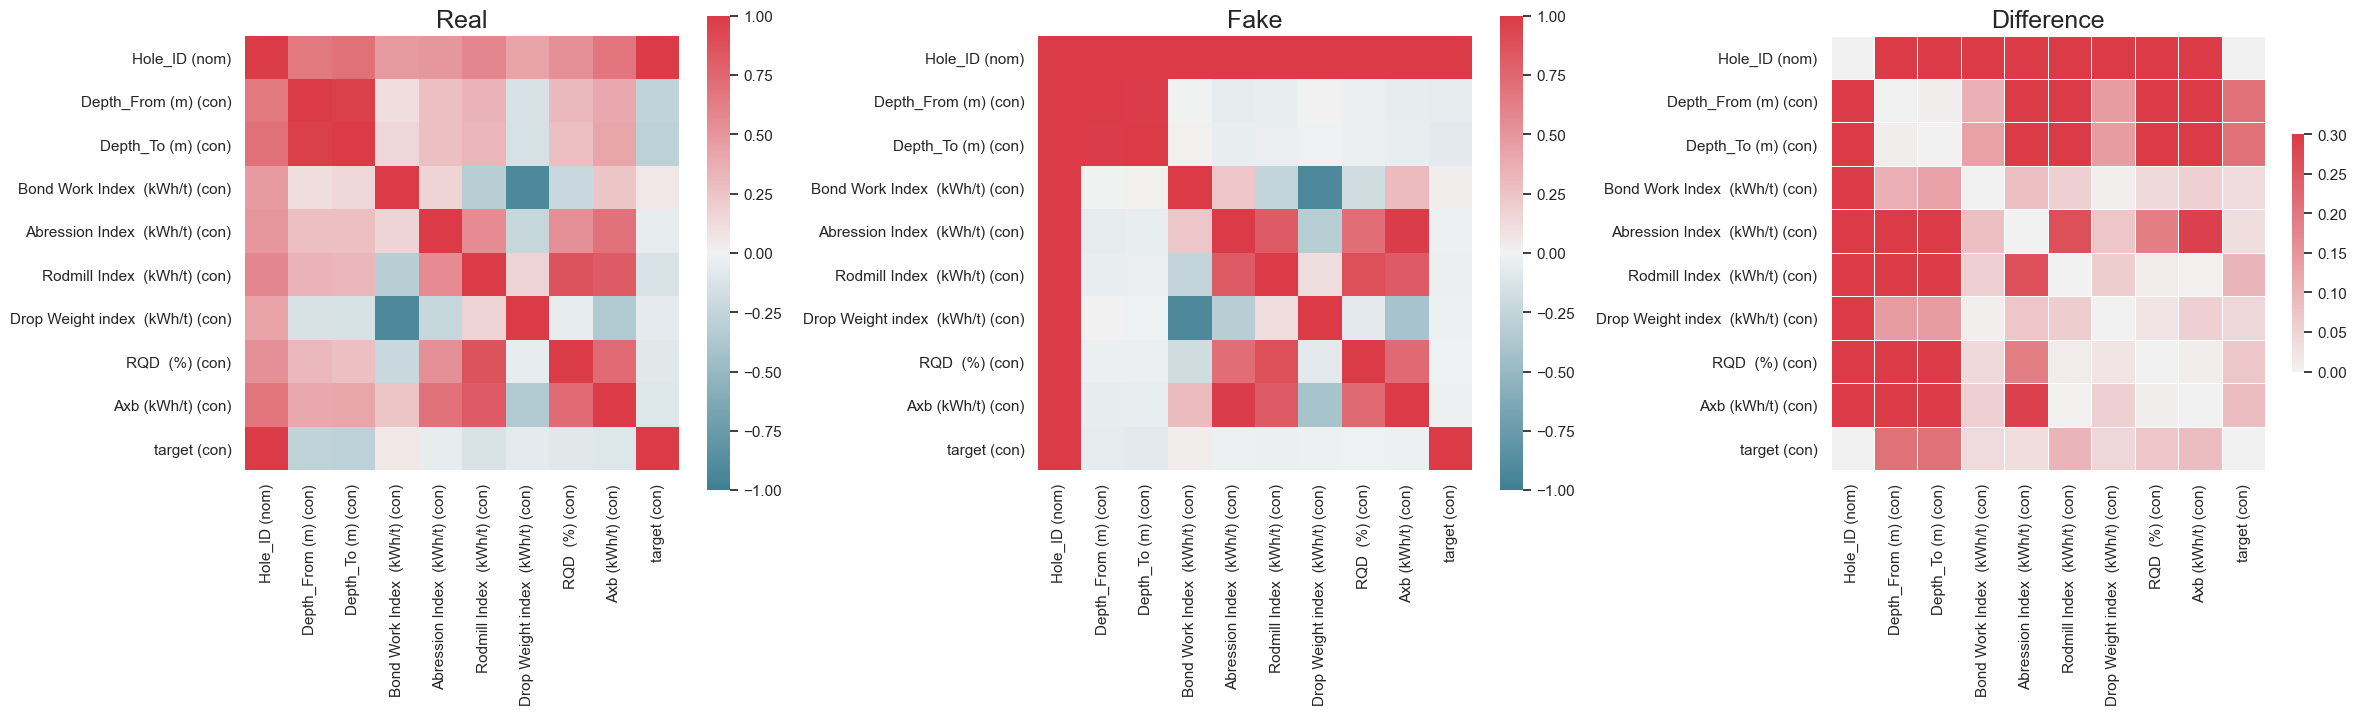

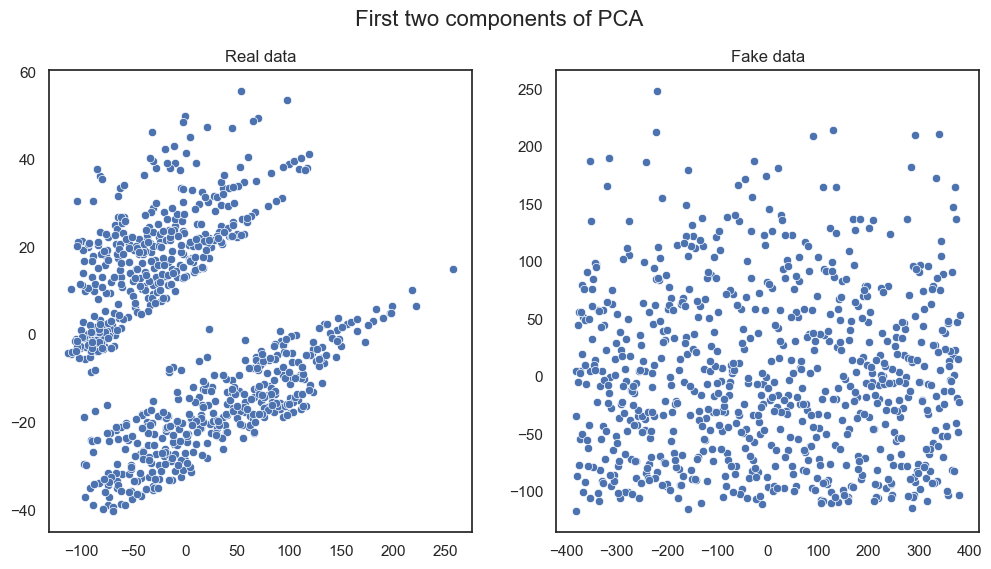

In [32]:
table_evaluator.visual_evaluation()

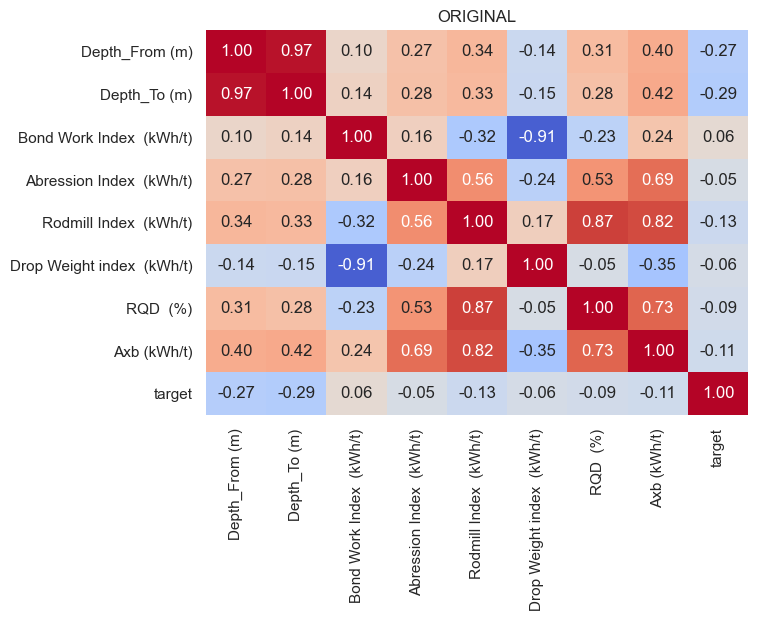

In [33]:
# Compute the correlation matrix
corr = geo.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('ORIGINAL')
plt.show()

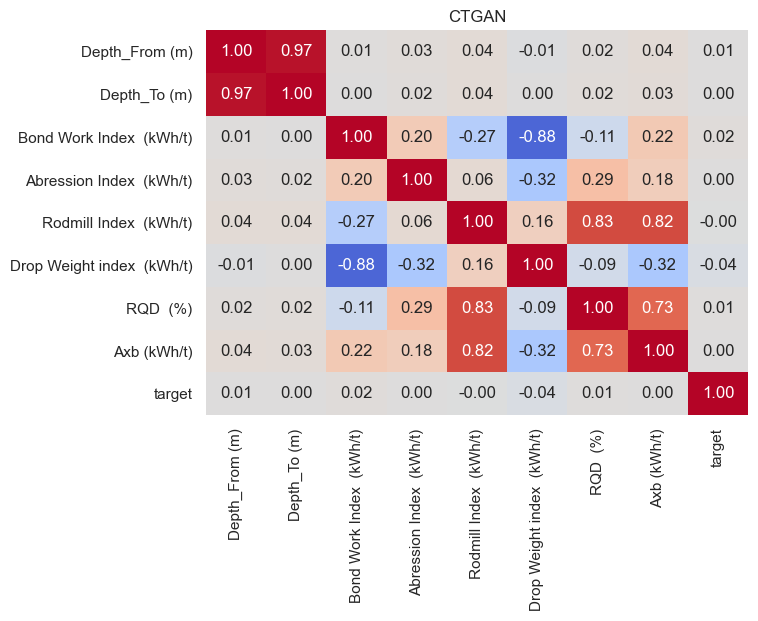

In [34]:
# Compute the correlation matrix
corr1 = new_geo.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr1, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('CTGAN')
plt.show()

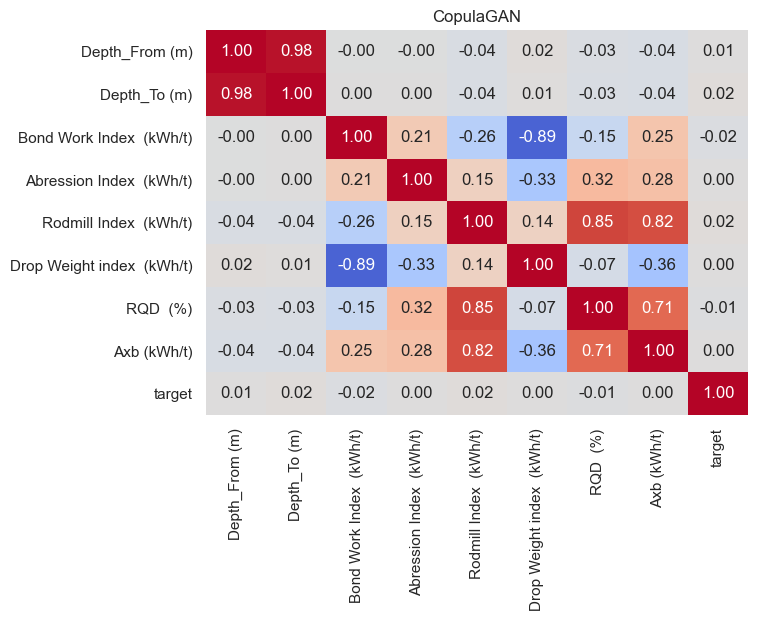

In [35]:
# Compute the correlation matrix
corr2 = new_data.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr2, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('CopulaGAN')
plt.show()

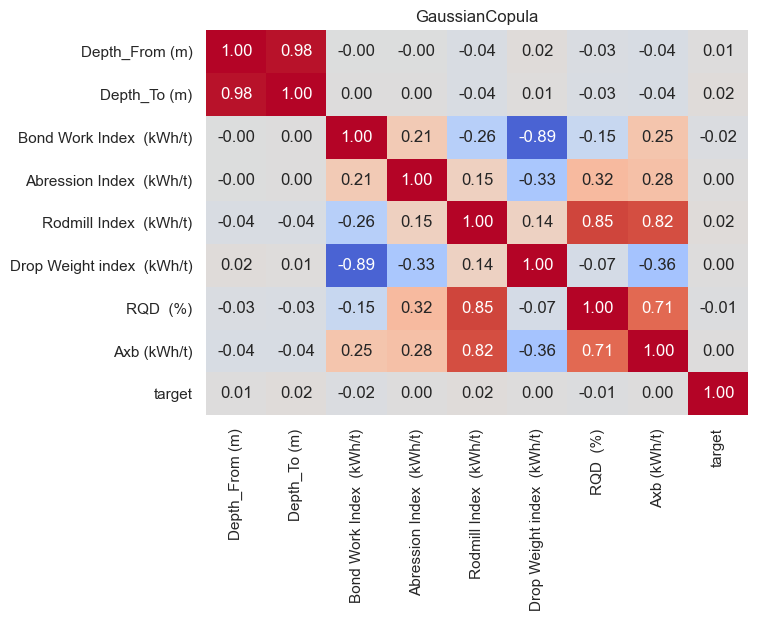

In [36]:
# Compute the correlation matrix
corr3 = new_data.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr3, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('GaussianCopula')
plt.show()

In [37]:
from scipy.stats import pearsonr

In [39]:
# Flatten the correlation matrices into 1-D arrays
corr = corr.values.flatten()
corr1 = corr1.values.flatten()

# Compute the Pearson correlation coefficient between the two 1-D arrays
r, p = pearsonr(corr, corr1)

# Calculate the percentage of correlation coefficient
percentage_corr = r * 100

# Print the percentage of correlation coefficient
print("Percentage of correlation coefficient between original and CTGAN: ", percentage_corr, "%")

Percentage of correlation coefficient between original and CopulaGAN:  91.36746317602365 %


In [41]:
# Flatten the correlation matrices into 1-D arrays
corr = corr.flatten()
corr2 = corr2.values.flatten()

# Compute the Pearson correlation coefficient between the two 1-D arrays
r, p = pearsonr(corr, corr2)

# Calculate the percentage of correlation coefficient
percentage_corr = r * 100

# Print the percentage of correlation coefficient
print("Percentage of correlation coefficient between original and CopulaGAN: ", percentage_corr, "%")

Percentage of correlation coefficient between original and CopulaGAN:  90.55821255062301 %


In [42]:
# Flatten the correlation matrices into 1-D arrays
corr = corr.flatten()
corr3 = corr3.values.flatten()

# Compute the Pearson correlation coefficient between the two 1-D arrays
r, p = pearsonr(corr, corr3)

# Calculate the percentage of correlation coefficient
percentage_corr = r * 100

# Print the percentage of correlation coefficient
print("Percentage of correlation coefficient between original and GaussianCopula: ", percentage_corr, "%")

Percentage of correlation coefficient between original and GaussianCopula:  90.55821255062301 %
